### Importing libraries

In [432]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [433]:
housing = pd.read_csv("train.csv")

In [434]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [435]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### The following steps are performed to identify and removes columns with null values

In [436]:
housing.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [437]:
round(housing.isnull().sum()/len(housing.index), 2)*100

Id                 0.0
MSSubClass         0.0
MSZoning           0.0
LotFrontage       18.0
LotArea            0.0
Street             0.0
Alley             94.0
LotShape           0.0
LandContour        0.0
Utilities          0.0
LotConfig          0.0
LandSlope          0.0
Neighborhood       0.0
Condition1         0.0
Condition2         0.0
BldgType           0.0
HouseStyle         0.0
OverallQual        0.0
OverallCond        0.0
YearBuilt          0.0
YearRemodAdd       0.0
RoofStyle          0.0
RoofMatl           0.0
Exterior1st        0.0
Exterior2nd        0.0
MasVnrType        60.0
MasVnrArea         1.0
ExterQual          0.0
ExterCond          0.0
Foundation         0.0
BsmtQual           3.0
BsmtCond           3.0
BsmtExposure       3.0
BsmtFinType1       3.0
BsmtFinSF1         0.0
BsmtFinType2       3.0
BsmtFinSF2         0.0
BsmtUnfSF          0.0
TotalBsmtSF        0.0
Heating            0.0
HeatingQC          0.0
CentralAir         0.0
Electrical         0.0
1stFlrSF   

### Removing the columns having more than 90% missing values

In [438]:
missing_columns = housing.columns[100*(housing.isnull().sum()/len(housing.index)) > 90]
print(missing_columns)

Index(['Alley', 'PoolQC', 'MiscFeature'], dtype='object')


In [439]:
housing.shape

(1460, 81)

In [440]:
housing = housing.drop(missing_columns, axis=1)
print(housing.shape)


(1460, 78)


In [441]:
# summarise number of missing values again
round(housing.isnull().sum()/len(housing.index), 2)*100

Id                0.0
MSSubClass        0.0
MSZoning          0.0
LotFrontage      18.0
LotArea           0.0
Street            0.0
LotShape          0.0
LandContour       0.0
Utilities         0.0
LotConfig         0.0
LandSlope         0.0
Neighborhood      0.0
Condition1        0.0
Condition2        0.0
BldgType          0.0
HouseStyle        0.0
OverallQual       0.0
OverallCond       0.0
YearBuilt         0.0
YearRemodAdd      0.0
RoofStyle         0.0
RoofMatl          0.0
Exterior1st       0.0
Exterior2nd       0.0
MasVnrType       60.0
MasVnrArea        1.0
ExterQual         0.0
ExterCond         0.0
Foundation        0.0
BsmtQual          3.0
BsmtCond          3.0
BsmtExposure      3.0
BsmtFinType1      3.0
BsmtFinSF1        0.0
BsmtFinType2      3.0
BsmtFinSF2        0.0
BsmtUnfSF         0.0
TotalBsmtSF       0.0
Heating           0.0
HeatingQC         0.0
CentralAir        0.0
Electrical        0.0
1stFlrSF          0.0
2ndFlrSF          0.0
LowQualFinSF      0.0
GrLivArea 

In [442]:
# removing the columns having more than 90% missing values
missing_columns = housing.columns[100*(housing.isnull().sum()/len(housing.index)) > 30]
print(missing_columns)

Index(['MasVnrType', 'FireplaceQu', 'Fence'], dtype='object')


In [443]:
housing.loc[:, ['LotFrontage', 'MasVnrType', 'FireplaceQu', 'Fence']].head()

,LotFrontage,MasVnrType,FireplaceQu,Fence
0,65.0,BrkFace,NaN,NaN
1,80.0,NaN,TA,NaN
2,68.0,BrkFace,TA,NaN
3,60.0,NaN,Gd,NaN
4,84.0,BrkFace,TA,NaN


#### Keeping the above columns with Null values as they could possible be pointing to expensive houses

### Alternate solution where all null columns are removed so that regression is not affected

In [444]:
null_columns = housing.columns[housing.isna().any()]
null_columns

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'Fence'],
      dtype='object')

In [445]:
housing = housing.drop(null_columns, axis=1)
print(housing.shape)


(1460, 62)


In [446]:
## Dropping the column ID as well as this isn't required
housing = housing.drop('Id', axis=1)
print(housing.shape)


(1460, 61)


### Reading the data and understanding data dictionary

In [447]:
housing['MSSubClass'].astype('category').value_counts()

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64

In [448]:
housing['MSZoning'].astype('category').value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

In [449]:
housing['LandContour'].astype('category').value_counts()

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64

In [450]:
housing['Neighborhood'].astype('category').value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

In [451]:
housing['BldgType'].astype('category').value_counts()

BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64

In [452]:
housing['OverallQual'].astype('category').value_counts()

OverallQual
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: count, dtype: int64

#### Data Exploration

To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. Let's see whether that's true in this case.


I will first subset the list of all (independent) numeric variables, and then make a **pairwise plot**.

In [453]:
# all numeric (float and int) variables in the dataset
housing_numeric = housing.select_dtypes(include=['float64', 'int64'])
housing_numeric.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000


In [454]:
#Creating a correlation matrix for better understanding

# correlation matrix
corr_housing = housing_numeric.corr()
corr_housing

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,-0.069836,-0.065649,-0.140759,-0.238518,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotArea,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.214103,0.111170,-0.002618,0.260833,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.239666,-0.059119,0.308159,0.537808,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.046231,0.040229,-0.136841,-0.171098,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.249503,-0.049107,0.149040,0.391452,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.128451,-0.067759,0.181133,0.291066,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
BsmtFinSF1,-0.069836,0.214103,0.239666,-0.046231,0.249503,0.128451,1.000000,-0.050117,-0.495251,0.522396,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.050117,1.000000,-0.209294,0.104810,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,-0.140759,-0.002618,0.308159,-0.136841,0.149040,0.181133,-0.495251,-0.209294,1.000000,0.415360,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479
TotalBsmtSF,-0.238518,0.260833,0.537808,-0.171098,0.391452,0.291066,0.522396,0.104810,0.415360,1.000000,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581


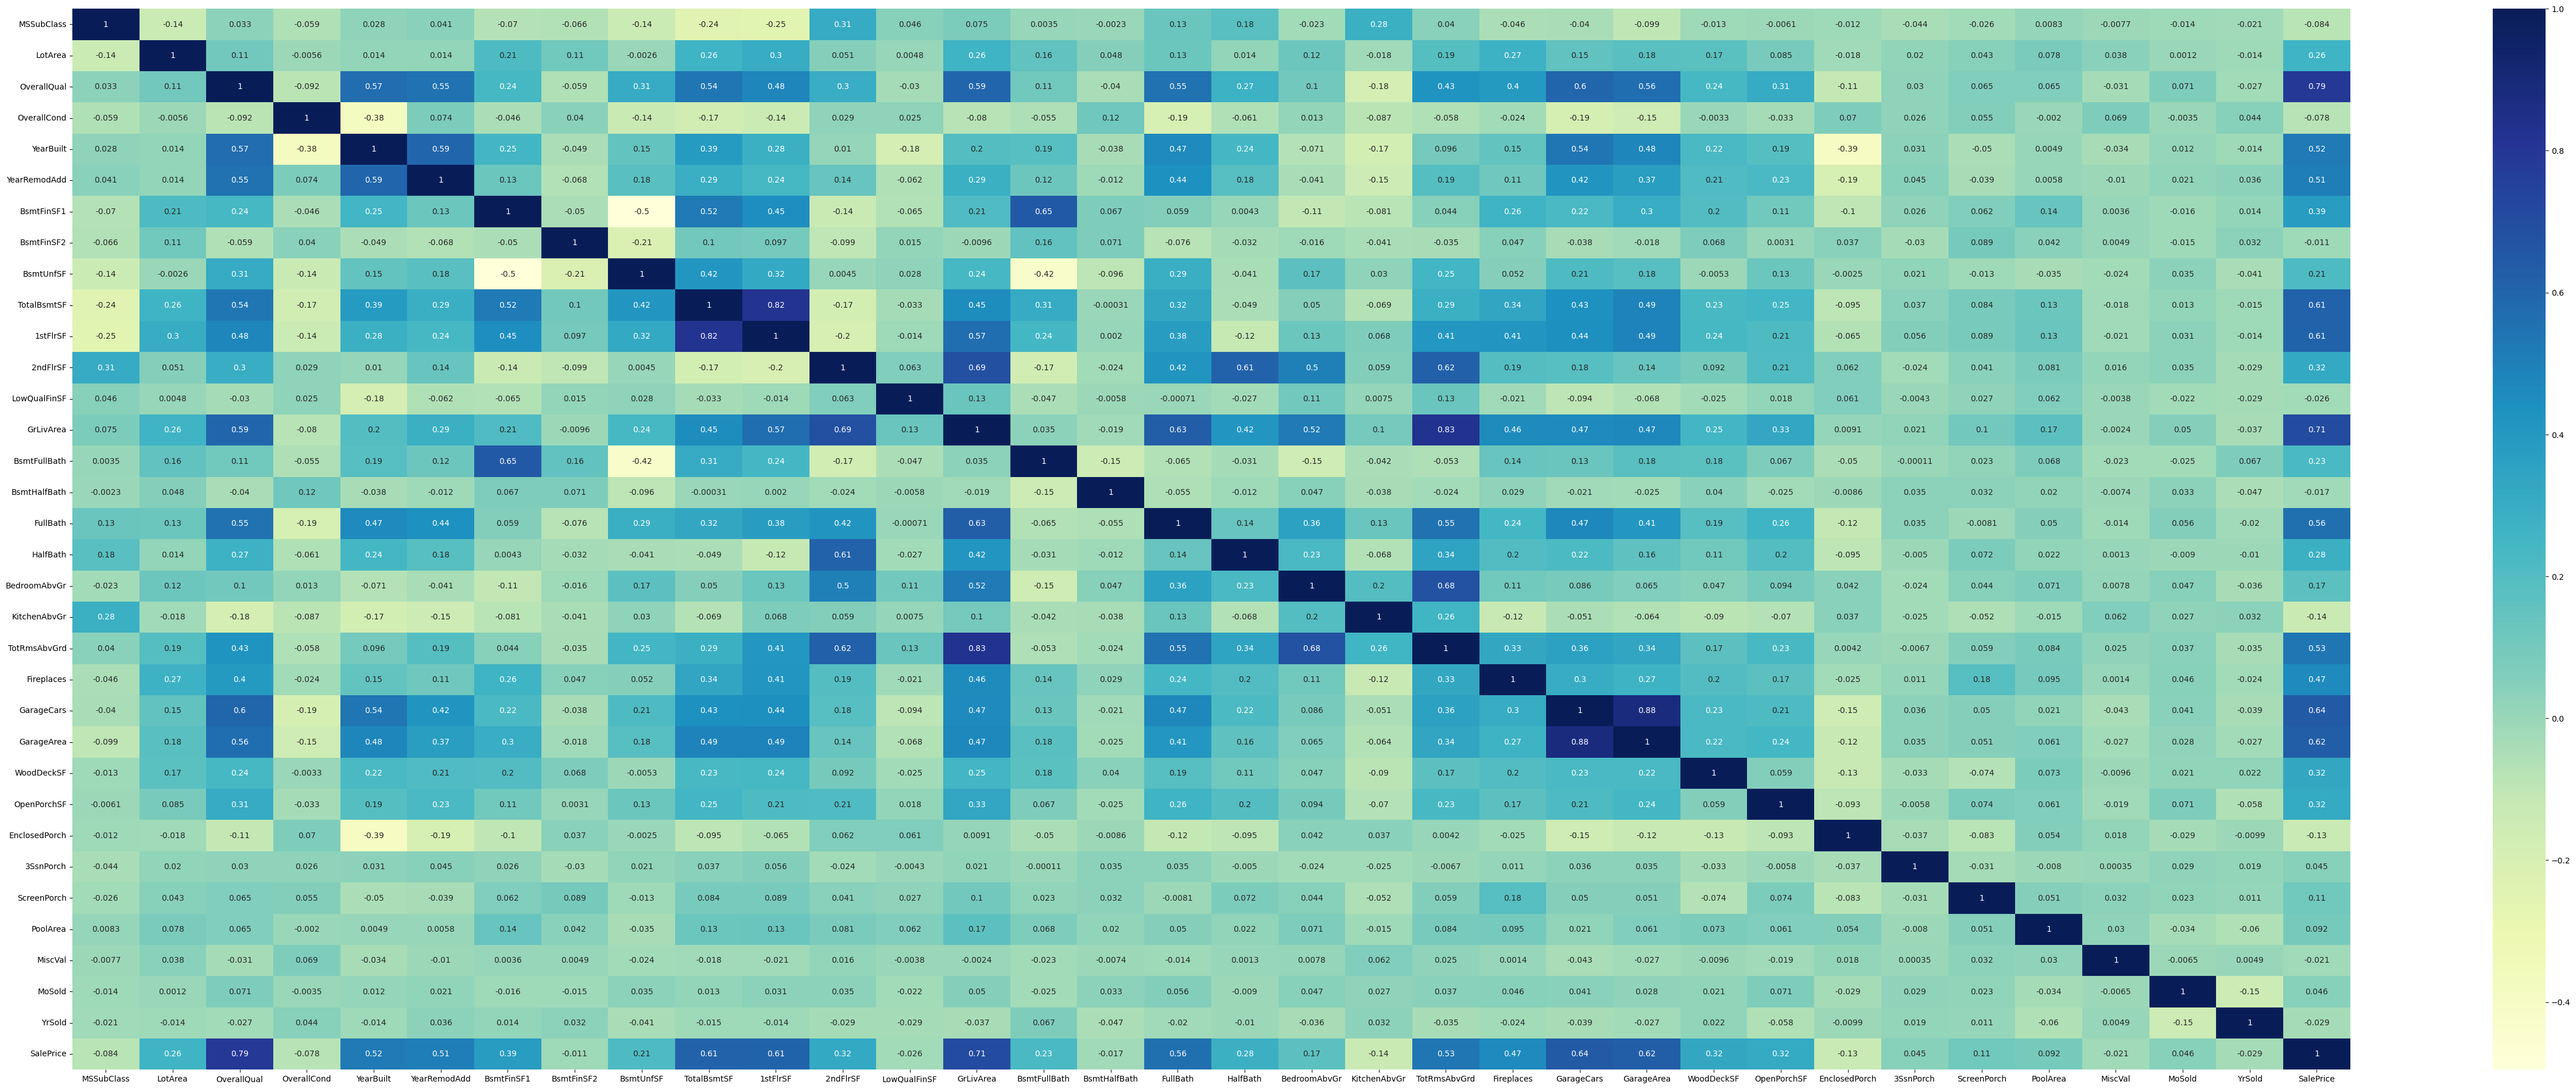

In [455]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(64,24))

# heatmap
sns.heatmap(corr_housing, cmap="YlGnBu", annot=True)
plt.show()

### writeup to be written about inferences from heatmap

### Identifying the no of columns that are objects

In [456]:
housing_object =  housing.select_dtypes(include=['object'])
housing_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  ExterQual      1460 non-null   object
 17  ExterCond      1460 non-null   object
 18  Foundation     1460 non-null

In [457]:
housing.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [458]:
housing.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,1057.429452,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,438.705324,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,991.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,1298.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [544]:
col_to_exclude = 'SalePrice'
X = housing.loc[:, housing.columns != col_to_exclude]
y = housing[col_to_exclude]

In [545]:
# creating dummy variables for categorical variables

# subset all categorical variables
housing_categorical = X.select_dtypes(include=['object'])
housing_categorical.head()


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal


In [546]:
# convert into dummies - one hot encoding
housing_dummies = pd.get_dummies(housing_categorical, drop_first=True, dtype= int)
housing_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [547]:
#Now lets drop all the categorical variables

# drop categorical variables 
X = X.drop(list(housing_categorical.columns), axis=1)

In [548]:
# concat dummy variables with X
X = pd.concat([X, housing_dummies], axis=1)

In [549]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=188)

In [550]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## Model Building and Evaluation

### Test linear regression

In [551]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [552]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

180668.84893118375
[-1.74732337e+03  7.16973917e+03  9.72381766e+03  5.47492077e+03
  1.44482453e+04  2.68930591e+03  9.51368066e+03  8.45355069e+02
 -7.92696177e+02  9.40329915e+03  9.70615534e+03  1.90398340e+04
 -1.59505368e+03  2.28098965e+04  8.83831756e+02  3.28694262e+01
 -3.52617346e+02 -2.33637477e+03 -4.41679525e+03 -4.16954838e+03
 -7.07240887e+02  9.61659786e+02  3.96870019e+03  1.37428959e+03
  1.32147340e+03  1.53465204e+03 -6.53802576e+01  7.05232327e+02
  8.19314163e+02  3.44794195e+03  4.08758329e+02 -1.13375445e+03
 -5.06079923e+02  5.47662043e+03  2.92292958e+03  1.14804538e+04
  8.48903522e+03  3.19484473e+03 -5.28821255e+02  2.13552620e-01
  1.45297130e+02  1.73152643e+03 -3.11697569e+02  1.84757693e+03
 -4.23391369e+02  1.93252907e+03 -7.86314875e+02  1.38870495e+02
 -2.46144477e+02  1.53784929e+03 -1.61314087e+03  6.11792316e+02
  1.85542196e+03  2.16584808e+03 -7.06716116e+02 -1.19752867e+03
  4.45999658e+03 -8.33552364e+02 -1.71256815e+03  1.72522264e+03
  1.06

In [553]:
from sklearn.metrics import r2_score, mean_squared_error

In [554]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9367878006317418
0.8240267318857967
403338004621.35
496018055840.2014
395042120.0992654
1132461314.7036562


### Implementing Ridge and lasso regression

### Ridge

In [556]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': np.logspace(-4, 4, 1000)}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-04, 1.01861017e-04, 1.03756668e-04, 1.05687597e-04,
       1.07654461e-04, 1.09657929e-04, 1.11698682e-04, 1.13777413e-04,
       1.15894830e-04, 1.18051653e-04, 1.20248614e-04, 1.22486461e-04,
       1.24765955e-04, 1.27087871e-04, 1.29452998e-04, 1.31862140e-04,
       1.34316117e-04, 1.36815763e-04, 1.39361927e-04, 1....
       7.04446228e+03, 7.17556092e+03, 7.30909933e+03, 7.44512291e+03,
       7.58367791e+03, 7.72481145e+03, 7.86857151e+03, 8.01500696e+03,
       8.16416760e+03, 8.31610415e+03, 8.47086827e+03, 8.62851257e+03,
       8.78909065e+03, 8.95265713e+03, 9.11926760e+03, 9.28897872e+03,
       9.46184819e+03, 9.63793480e+03, 9.81729841e+03, 1.00000000e+04])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [557]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': np.float64(8.412497049736118)}


In [558]:
#Fitting Ridge model for alpha = 8.412497049736118 and printing coefficients which have been penalised
alpha = 8.412497049736118
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-2.87607577e+03  6.12392966e+03  1.18360562e+04  4.81627824e+03
  1.01547333e+04  2.82127499e+03  6.80269950e+03  6.59537994e+02
 -1.21742489e+03  6.08872166e+03  8.94306929e+03  1.75333304e+04
 -1.02865223e+03  2.10494290e+04  2.63546801e+03  6.12951305e+02
  1.51530696e+03 -1.24264544e+03 -3.63751321e+03 -3.84985957e+03
 -1.77046525e+02  1.42281859e+03  6.51132956e+03 -9.08280114e+02
  1.56461264e+03  1.16674627e+03  2.58168732e+02  7.73272852e+02
  1.24933475e+03  1.11048112e+03  2.78602692e+02 -1.17656590e+03
 -7.68106809e+02  3.19852162e+03  1.91034923e+03  7.09379208e+03
  5.27764950e+03  2.86311969e+03 -2.12705840e+02 -1.30386920e+03
  8.96595985e+01  2.55905844e+03  6.57896663e+02  2.95293818e+03
 -6.67796617e+02  2.33621354e+03 -9.71751311e+02 -1.86613410e+02
 -1.35518597e+02  1.73211017e+03 -9.04010489e+02  3.63982653e+02
  1.52695768e+03  1.00009410e+03 -6.39872586e+02 -1.22743210e+03
  3.96416982e+03 -2.24312220e+03 -1.96711035e+03  3.65850092e+02
  5.15691590e+02 -2.34154

In [559]:
# Calculation R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9304814175620966
0.8425091727932087
443577135502.8777
443921368063.0198
434453609.6991946
1013519105.1667118


### Lasso

In [560]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-04, 1.01861017e-04, 1.03756668e-04, 1.05687597e-04,
       1.07654461e-04, 1.09657929e-04, 1.11698682e-04, 1.13777413e-04,
       1.15894830e-04, 1.18051653e-04, 1.20248614e-04, 1.22486461e-04,
       1.24765955e-04, 1.27087871e-04, 1.29452998e-04, 1.31862140e-04,
       1.34316117e-04, 1.36815763e-04, 1.39361927e-04, 1....
       7.04446228e+03, 7.17556092e+03, 7.30909933e+03, 7.44512291e+03,
       7.58367791e+03, 7.72481145e+03, 7.86857151e+03, 8.01500696e+03,
       8.16416760e+03, 8.31610415e+03, 8.47086827e+03, 8.62851257e+03,
       8.78909065e+03, 8.95265713e+03, 9.11926760e+03, 9.28897872e+03,
       9.46184819e+03, 9.63793480e+03, 9.81729841e+03, 1.00000000e+04])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [561]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': np.float64(355.2634676578139)}


In [562]:
#Fitting Lasso model for alpha = 355.2634676578139 and printing coefficients which have been penalised

alpha = 355.2634676578139

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=355.2634676578139)

In [563]:
lasso.coef_

array([-3.20074287e+03,  4.69463893e+03,  1.36777754e+04,  4.48007522e+03,
        8.42758958e+03,  3.36508164e+03,  7.48250389e+03,  6.17728980e+02,
       -0.00000000e+00,  3.63358580e+03,  0.00000000e+00,  0.00000000e+00,
       -2.27054433e+03,  3.42961633e+04,  3.02320352e+03,  1.59345058e+02,
        1.77549752e+03, -6.00676543e+01, -3.07425438e+03, -3.33520671e+03,
        0.00000000e+00,  1.39388871e+03,  5.65927092e+03,  0.00000000e+00,
        1.56673023e+03,  8.09675851e+02, -0.00000000e+00,  3.43950951e+02,
        6.61966724e+02,  2.18598562e+02,  0.00000000e+00, -8.09157046e+02,
       -2.11208360e+02,  0.00000000e+00,  0.00000000e+00,  5.45984783e+02,
       -0.00000000e+00,  1.88270781e+03,  0.00000000e+00, -1.00492335e+03,
       -0.00000000e+00,  1.69050541e+03,  0.00000000e+00,  9.47617402e+02,
       -4.00055541e+02,  2.32385054e+03, -5.11339828e+02, -3.15850432e+01,
        0.00000000e+00,  9.55357163e+02,  0.00000000e+00,  0.00000000e+00,
        9.94975922e+01,  

In [564]:
# Calculating R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.922055487305013
0.8488220239540875
497340458578.7285
426127255393.61426
487111124.9546802
972893277.1543704


In [565]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.367878e-01,9.304814e-01,9.220555e-01
1,R2 Score (Test),8.240267e-01,8.425092e-01,8.488220e-01
2,RSS (Train),4.033380e+11,4.435771e+11,4.973405e+11
3,RSS (Test),4.960181e+11,4.439214e+11,4.261273e+11
4,MSE (Train),1.987567e+04,2.084355e+04,2.207059e+04
5,MSE (Test),3.365206e+04,3.183581e+04,3.119124e+04


In [566]:
betas = pd.DataFrame(index=X.columns)

In [567]:
betas.rows = X.columns

In [568]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [569]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
MSSubClass,-1747.323371,-2876.075766,-3200.742866
LotArea,7169.739171,6123.929658,4694.638928
OverallQual,9723.817660,11836.056163,13677.775445
OverallCond,5474.920768,4816.278240,4480.075224
YearBuilt,14448.245330,10154.733329,8427.589581
YearRemodAdd,2689.305911,2821.274994,3365.081643
BsmtFinSF1,9513.680656,6802.699495,7482.503887
BsmtFinSF2,845.355069,659.537994,617.728980
BsmtUnfSF,-792.696177,-1217.424894,-0.000000
TotalBsmtSF,9403.299146,6088.721658,3633.585797


#### Remove all features whose values are 0 after Lasso Regression

In [570]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(lasso, threshold=1e-6, prefit=True)
X_selected = selector.transform(X)
selected_features = X.columns[selector.get_support()]

In [571]:
selected_features

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF',
       'LowQualFinSF',
       ...
       'Functional_Sev', 'Functional_Typ', 'SaleType_CWD', 'SaleType_Con',
       'SaleType_ConLD', 'SaleType_New', 'SaleType_Oth',
       'SaleCondition_AdjLand', 'SaleCondition_Family',
       'SaleCondition_Normal'],
      dtype='object', length=127)

In [572]:
X = X[selected_features]

In [573]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

### Repeat regression after removing the features and see if R2 is improved for test data set

### Linear Regression

In [574]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [575]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

180613.6073765651
[-2.56469542e+03  5.34781044e+03  9.89051237e+03  5.89959631e+03
  1.29836574e+04  2.82885711e+03  9.89069936e+03  1.16650308e+03
  5.24549801e+03 -3.61731854e+03  3.99383911e+04  1.28484643e+03
 -1.44647259e+02  2.78600250e+02 -2.26020339e+03 -4.71205476e+03
 -3.93581273e+03  1.05502462e+03  4.66664859e+03  1.42818665e+03
  1.80872752e+03  7.06919901e+02  6.38636576e+02  3.98257215e+03
 -1.31425748e+03 -4.28240503e+02  5.97067824e+02  2.97005814e+03
  3.15103177e+02  2.21631851e+03  2.05793274e+03 -5.45890111e+02
  2.04870376e+03 -8.22377447e+02 -4.75153208e+01  1.45547655e+03
  1.30048851e+03  1.50366643e+03 -2.38600073e+02  4.32137474e+03
 -1.13316789e+03 -1.46492488e+03 -1.89301762e+03 -1.37701771e+03
  1.53525450e+03 -2.37226780e+03  5.56834795e+03  4.88987701e+03
  2.94769784e+02  1.06369462e+03 -5.80881910e+02  3.60591642e+03
  3.73939218e+03  1.10056341e+03  5.23328973e+02  4.34875385e+03
  9.18158921e+02 -1.24060449e+03  1.03695666e+03  8.20811429e+02
 -4.330

In [576]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9339356927880318
0.8308042780170674
421536445715.6896
476914101634.9613
412866254.37383896
1088844980.9017382


### Ridge Regression

In [577]:
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-04, 1.01861017e-04, 1.03756668e-04, 1.05687597e-04,
       1.07654461e-04, 1.09657929e-04, 1.11698682e-04, 1.13777413e-04,
       1.15894830e-04, 1.18051653e-04, 1.20248614e-04, 1.22486461e-04,
       1.24765955e-04, 1.27087871e-04, 1.29452998e-04, 1.31862140e-04,
       1.34316117e-04, 1.36815763e-04, 1.39361927e-04, 1....
       7.04446228e+03, 7.17556092e+03, 7.30909933e+03, 7.44512291e+03,
       7.58367791e+03, 7.72481145e+03, 7.86857151e+03, 8.01500696e+03,
       8.16416760e+03, 8.31610415e+03, 8.47086827e+03, 8.62851257e+03,
       8.78909065e+03, 8.95265713e+03, 9.11926760e+03, 9.28897872e+03,
       9.46184819e+03, 9.63793480e+03, 9.81729841e+03, 1.00000000e+04])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [578]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': np.float64(5.926151812475553)}


In [579]:
#Fitting Ridge model for alpha = 5.926151812475553 and printing coefficients which have been penalised
alpha = 5.926151812475553
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-2.83346763e+03  5.36326844e+03  1.13861492e+04  5.16199064e+03
  1.03342795e+04  3.12158744e+03  8.22449516e+03  1.17255016e+03
  3.37213505e+03 -2.98479671e+03  3.66298686e+04  2.55914639e+03
  3.89051703e+02  1.72904114e+03 -1.12990303e+03 -3.67851636e+03
 -3.71835720e+03  1.42394185e+03  5.39065130e+03  1.59091551e+03
  1.44330790e+03  7.49063094e+02  9.32023326e+02  2.00116405e+03
 -1.23619928e+03 -6.64332980e+02  6.69352254e+02  2.85446099e+03
 -7.90863010e+02  2.49916853e+03  2.39075360e+03 -6.59052097e+02
  2.35362595e+03 -9.39227099e+02 -2.48022637e+02  1.69578193e+03
  1.25397807e+03  1.18700527e+03  1.32738810e+01  4.22941530e+03
 -1.73042240e+03 -1.43993903e+03 -1.97431420e+03 -1.55541917e+03
  1.30110553e+03 -2.23556124e+03  6.40729834e+03  5.94692942e+03
 -2.61985405e+02  9.47960348e+02 -8.16591371e+02  3.80171935e+03
  3.87185729e+03  1.17525676e+03 -3.32341499e+02  3.88771375e+03
  9.32865754e+02 -1.34788013e+03  1.11131130e+03  7.88900300e+02
 -4.94632610e+02  1.11455

In [580]:
# Recalculating metrices
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9302835428859034
0.8437506029588466
444839714211.7106
440422133299.5813
435690219.6001083
1005529984.7022405


### Lasso Regression

In [581]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-04, 1.01861017e-04, 1.03756668e-04, 1.05687597e-04,
       1.07654461e-04, 1.09657929e-04, 1.11698682e-04, 1.13777413e-04,
       1.15894830e-04, 1.18051653e-04, 1.20248614e-04, 1.22486461e-04,
       1.24765955e-04, 1.27087871e-04, 1.29452998e-04, 1.31862140e-04,
       1.34316117e-04, 1.36815763e-04, 1.39361927e-04, 1....
       7.04446228e+03, 7.17556092e+03, 7.30909933e+03, 7.44512291e+03,
       7.58367791e+03, 7.72481145e+03, 7.86857151e+03, 8.01500696e+03,
       8.16416760e+03, 8.31610415e+03, 8.47086827e+03, 8.62851257e+03,
       8.78909065e+03, 8.95265713e+03, 9.11926760e+03, 9.28897872e+03,
       9.46184819e+03, 9.63793480e+03, 9.81729841e+03, 1.00000000e+04])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [582]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': np.float64(219.95930680300748)}


In [583]:
#Fitting Lasso model for alpha = 2219.95930680300748 and printing coefficients which have been penalised

alpha = 219.95930680300748

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=219.95930680300748)

In [591]:
lasso.coef_

array([-2.94896193e+03,  4.94427057e+03,  1.22176421e+04,  5.02315706e+03,
        1.01661517e+04,  3.15684733e+03,  8.39680993e+03,  8.28004739e+02,
        4.24641176e+03, -2.78181672e+03,  3.64333873e+04,  2.36075411e+03,
        4.17069738e+01,  1.21410061e+03, -8.92162124e+02, -3.70125735e+03,
       -3.56197136e+03,  1.26295644e+03,  5.27961119e+03,  1.51267185e+03,
        1.18763974e+03,  4.82210074e+02,  6.49920032e+02,  1.64881056e+03,
       -1.00221875e+03, -2.91566555e+02,  5.67336452e+02,  2.29788603e+03,
       -5.03020304e+02,  1.89003015e+03,  1.36911826e+03, -4.54989211e+02,
        2.21635226e+03, -6.36060864e+02, -4.00814191e+01,  1.14868167e+03,
        5.54377852e+02,  1.06686777e+03,  1.36824950e+02,  3.96876962e+03,
       -1.20163719e+03, -9.47448215e+02, -1.54687650e+03, -9.84039952e+02,
        8.29212642e+02, -1.74730993e+03,  6.17855938e+03,  6.01830356e+03,
       -1.77013922e+02,  4.92449857e+02, -3.73452920e+02,  3.51057202e+03,
        3.26801868e+03,  

In [592]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9293666753646339
0.8457933529588717
450689969703.9546
434664208278.13727
441420146.6248331
992384037.1646969


In [593]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.339357e-01,9.302835e-01,9.293667e-01
1,R2 Score (Test),8.308043e-01,8.437506e-01,8.457934e-01
2,RSS (Train),4.215364e+11,4.448397e+11,4.506900e+11
3,RSS (Test),4.769141e+11,4.404221e+11,4.346642e+11
4,MSE (Train),2.031911e+04,2.087319e+04,2.101000e+04
5,MSE (Test),3.299765e+04,3.171009e+04,3.150213e+04


### Re Observing changes after removing features and regularization

In [594]:
betas = pd.DataFrame(index=X.columns)

In [595]:
betas.rows = X.columns

In [596]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [597]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
MSSubClass,-2564.695420,-2833.467628,-2948.961934
LotArea,5347.810435,5363.268442,4944.270568
OverallQual,9890.512369,11386.149228,12217.642144
OverallCond,5899.596307,5161.990638,5023.157059
YearBuilt,12983.657411,10334.279451,10166.151688
YearRemodAdd,2828.857114,3121.587444,3156.847334
BsmtFinSF1,9890.699363,8224.495161,8396.809926
BsmtFinSF2,1166.503077,1172.550165,828.004739
TotalBsmtSF,5245.498014,3372.135051,4246.411755
LowQualFinSF,-3617.318535,-2984.796711,-2781.816719


In [598]:
coeffs = lasso.coef_
feature_names = X_train.columns  # Assuming X_train is a pandas DataFrame

# 2. Create a DataFrame to view them side-by-side
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coeffs,
    'Absolute_Coeff': abs(coeffs) # Useful for sorting by impact
})

# 3. Sort by absolute value to see the most influential features at the top
feature_importance = feature_importance.sort_values(by='Absolute_Coeff', ascending=False)

print(feature_importance)

                   Feature   Coefficient  Absolute_Coeff
75        RoofMatl_CompShg  66004.323188    66004.323188
79        RoofMatl_Tar&Grv  44151.853513    44151.853513
81        RoofMatl_WdShngl  37283.087214    37283.087214
10               GrLivArea  36433.387333    36433.387333
80        RoofMatl_WdShake  27540.684817    27540.684817
76        RoofMatl_Membran  14437.600113    14437.600113
62         Condition2_PosN -14344.197108    14344.197108
112         KitchenQual_Gd -14237.879755    14237.879755
77          RoofMatl_Metal  13355.033574    13355.033574
78           RoofMatl_Roll  13029.070473    13029.070473
113         KitchenQual_TA -12570.342258    12570.342258
2              OverallQual  12217.642144    12217.642144
100           ExterQual_TA -11583.889806    11583.889806
99            ExterQual_Gd -10226.505827    10226.505827
4                YearBuilt  10166.151688    10166.151688
6               BsmtFinSF1   8396.809926     8396.809926
46    Neighborhood_NoRidge   61

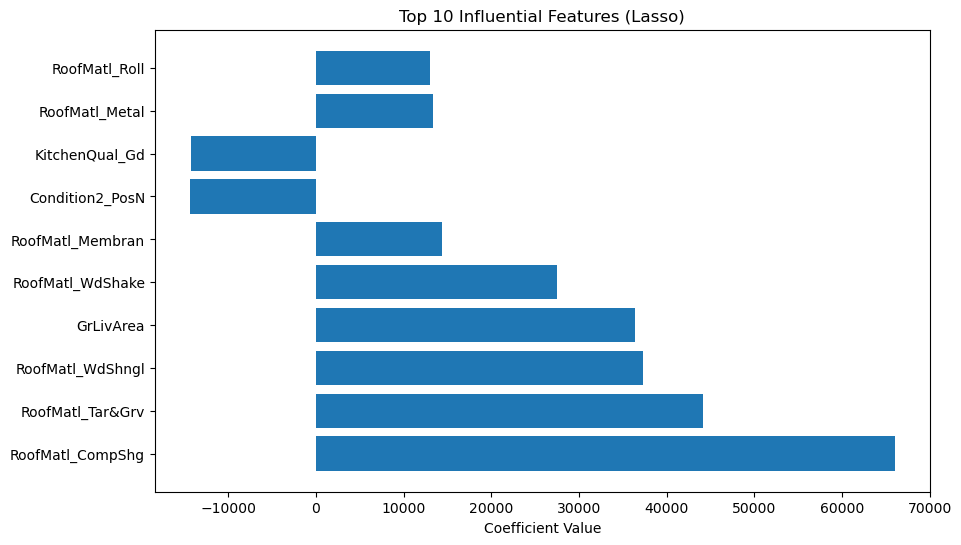

In [600]:
# Plotting the top 10 features (excluding the dropped ones)
top_features = feature_importance[feature_importance['Coefficient'] != 0].head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Top 10 Influential Features (Lasso)')
plt.show()